In [9]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

from HW2.benchmark_proceeder import BenchmarkStorage
from HW2.error_calculator import AbsErrorCalculator
from HW2.regression_generator import generate_regression
from HW2.sgd import sgd, minibatch_gd, gd
from HW2.visualization import visualize_regression_point, visualize_line, draw_levels

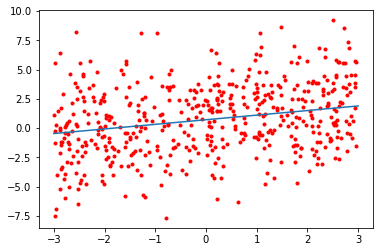

In [10]:
f, points = generate_regression(point_count=500, scale=np.array([3, 3]))

visualize_regression_point(f, points, scale=3)

In [11]:
storage = BenchmarkStorage()

# SGD

[0.42316612 0.75258044]
Benchmark results for config <('sgd', 1, Default(no) optimization, Squared error calculator)>:
Mean time:0.088515
Mean memory:0.0B
Mean SMAPE value:0.43672960192886995
Mean RMSE value:1.7046021889477414
Mean logcosh value:0.8481343566544559
Mean gradient calls:300.0
Iterations done:300.0


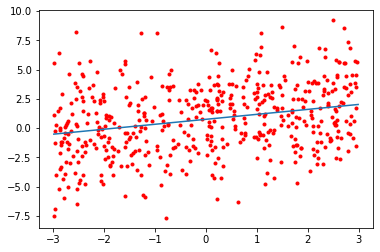

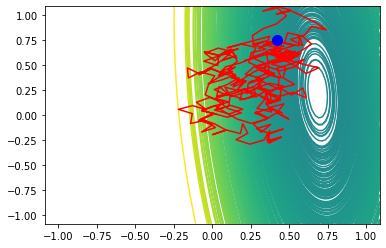

In [12]:
index = storage.add_benchmark_config()
ab, meta = sgd(points, eps=8e-2)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

#### Наблюдения
* `1` вызов градта за итерацию
* Точность плохая т.к. один градиент из суммы описывает очень плохо градиент суммы
* Градиент м/у итерациями сильно "прыгает"

# Minibatch GD
batch size = `[10, 50, 100]`

## 10

[0.37776178 0.49910059]
Benchmark results for config <('mini10', 1, Default(no) optimization, Squared error calculator)>:
Mean time:0.063352
Mean memory:0.0B
Mean SMAPE value:0.46024516852863034
Mean RMSE value:1.7908052171451225
Mean logcosh value:0.9124708021915908
Mean gradient calls:640.0
Iterations done:64.0


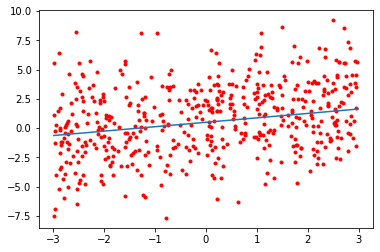

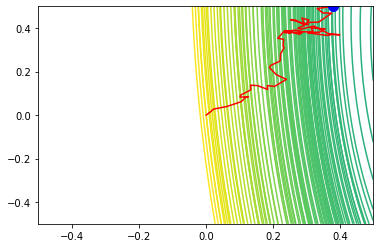

In [13]:
index = storage.add_benchmark_config(batch_size='mini10')
ab, meta = minibatch_gd(points, batch_size=10)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

## 50

[0.36659971 0.47101763]
Benchmark results for config <('mini50', 1, Default(no) optimization, Squared error calculator)>:
Mean time:0.278761
Mean memory:0.0B
Mean SMAPE value:0.467754502350037
Mean RMSE value:1.8206452370262654
Mean logcosh value:0.9344779924587523
Mean gradient calls:3850.0
Iterations done:77.0


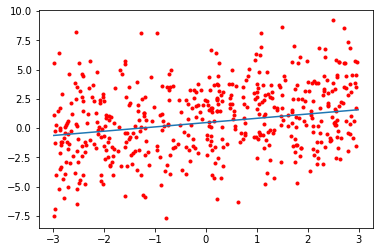

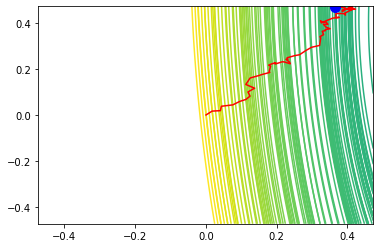

In [14]:
index = storage.add_benchmark_config(batch_size='mini50')
ab, meta = minibatch_gd(points, batch_size=50)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

## 100

[0.35620862 0.51158941]
Benchmark results for config <('mini100', 1, Default(no) optimization, Squared error calculator)>:
Mean time:0.269267
Mean memory:0.0B
Mean SMAPE value:0.4736014163114171
Mean RMSE value:1.8492575337929604
Mean logcosh value:0.955566292473484
Mean gradient calls:7100.0
Iterations done:71.0


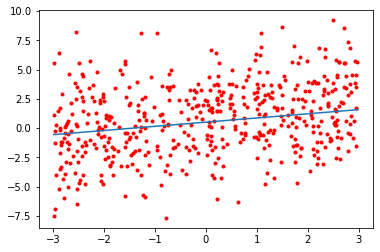

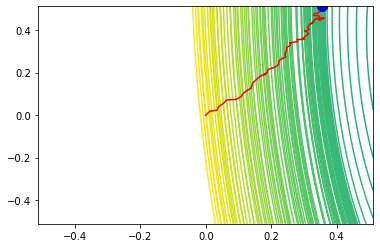

In [15]:
index = storage.add_benchmark_config(batch_size='mini100')
ab, meta = minibatch_gd(points, batch_size=100)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

#### Наблюдения
* `k` вызовов градта за итерацию
* Точность лучше т.к. `k` градиентов из суммы лучше описывает градиент суммы
* Градиент м/у итерациями меньше "прыгает"/почти не "прыгает"

# GD

[0.35187974 0.45715232]
Benchmark results for config <('gd', 1, Default(no) optimization, Squared error calculator)>:
Mean time:1.339822
Mean memory:0.0B
Mean SMAPE value:0.4772205012379754
Mean RMSE value:1.8614073467937113
Mean logcosh value:0.9645560614683846
Mean gradient calls:33500.0
Iterations done:67.0


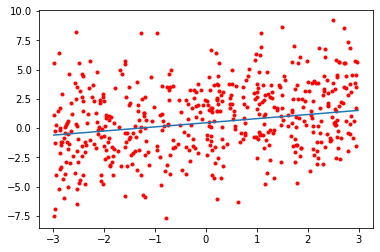

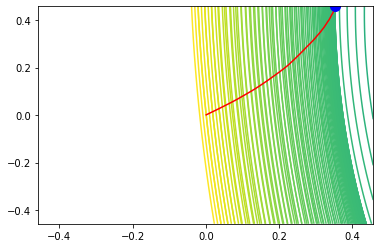

In [16]:
index = storage.add_benchmark_config(batch_size='gd')
ab, meta = gd(points)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

#### Наблюдения
* `n` вызовов градта за итерацию
* Точность лучше т.к. градиент всей функции
* Градиент м/у итерациями меньше "прыгает"/почти не "прыгает"

# Benchmark

In [17]:
batch_sizes = [1, 10, 25, 100, 250, 500]

result = np.array([])
for batch_size in tqdm(batch_sizes, "Batch sizes", position=2):
    index = storage.add_benchmark_config(batch_size=str(batch_size))
    for _ in range(20 if batch_size != len(points) else 1):
        ab, meta = minibatch_gd(points, batch_size=batch_size, eps=5e-2)
    storage.add_benchmark_result(index, meta)
    result = np.append(result, storage.get_benchmark_results_arrayed(index))

result

Batch sizes:   0%|          | 0/6 [00:00<?, ?it/s]

array([('1', 1, Default(no) optimization, Squared error calculator),
       2.027114, '0.0B', 0.4289689388581913, 1.608321880927662,
       0.7790539318385021, 10000.0, 10000.0,
       ('10', 1, Default(no) optimization, Squared error calculator),
       0.062903, '0.0B', 0.5296299608814369, 2.0732180730574314,
       1.1216259444719534, 880.0, 88.0,
       ('25', 1, Default(no) optimization, Squared error calculator),
       0.110381, '0.0B', 0.42362967636312593, 1.6191426903389978,
       0.7869426634716802, 1900.0, 76.0,
       ('100', 1, Default(no) optimization, Squared error calculator),
       0.374005, '0.0B', 0.4912906827187104, 1.9223346854603744,
       1.0096551668413756, 6500.0, 65.0,
       ('250', 1, Default(no) optimization, Squared error calculator),
       0.905453, '0.0B', 0.47049209679674253, 1.82926097139485,
       0.9408322527101898, 17000.0, 68.0,
       ('500', 1, Default(no) optimization, Squared error calculator),
       1.9438, '0.0B', 0.47726708308723537, 1

In [18]:
result = result.reshape((-1, 8))
df = pd.DataFrame(result, columns=[
    'Config',
    'Mean time',
    'Mean mem',
    'Mean SMAPE',
    'Mean RMSE',
    'Mean logcosh',
    'Mean gradient calls',
    'Mean iterations'
])
df.to_csv("data/2.1.csv", sep='\t')
df

,Config,Mean time,Mean mem,Mean SMAPE,Mean RMSE,Mean logcosh,Mean gradient calls,Mean iterations
0,"(1, 1, Default(no) optimization, Squared error...",2.027114,0.0B,0.428969,1.608322,0.779054,10000.0,10000.0
1,"(10, 1, Default(no) optimization, Squared erro...",0.062903,0.0B,0.52963,2.073218,1.121626,880.0,88.0
2,"(25, 1, Default(no) optimization, Squared erro...",0.110381,0.0B,0.42363,1.619143,0.786943,1900.0,76.0
3,"(100, 1, Default(no) optimization, Squared err...",0.374005,0.0B,0.491291,1.922335,1.009655,6500.0,65.0
4,"(250, 1, Default(no) optimization, Squared err...",0.905453,0.0B,0.470492,1.829261,0.940832,17000.0,68.0
5,"(500, 1, Default(no) optimization, Squared err...",1.9438,0.0B,0.477267,1.861667,0.964748,33500.0,67.0
